## Goal: Data Format
User Profiles Data
- Demographic information (age, gender, location)
- user preference and settings

Listening History
- Historical data on songs, albums, or artists a user has listened to
- Timestamps of when the user interacted with specific content

Playlist Data
- information about playlists created by user
- playlists the user follows

Audio Features
- Features describing audio characteristics of songs (danceability, energy, tempo)

User Interactions
- Likes, dislikes, skips
- ratings or reviews provided by user

In [43]:
#pip install spotipy
import pandas as pd

In [44]:
df_2 = pd.read_csv('spotify_dataset.csv', on_bad_lines='skip')
df_2

,user_id,artistname,trackname,playlistname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010
...,...,...,...,...
12891619,2302bf9c64dc63d88a750215ed187f2c,Mötley Crüe,Wild Side,iPhone
12891620,2302bf9c64dc63d88a750215ed187f2c,John Lennon,Woman,iPhone
12891621,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Don't Know How It Feels,iPhone
12891622,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Wreck Me,iPhone


In [45]:
df = df_2.copy()
df.isnull().sum()

user_id          0
artistname       0
trackname        0
playlistname    46
dtype: int64

In [46]:
df.columns = df.columns.str.replace("\"", "")
df.columns

Index(['user_id', 'artistname', 'trackname', 'playlistname'], dtype='object')

In [47]:
df["artistname"] = df["artistname"].fillna(df["artistname"].mode()[0])
df["trackname"] = df["trackname"].fillna(df["trackname"].mode()[0])
df["playlistname"] = df["playlistname"].fillna(df["playlistname"].mode()[0])
df['playlistname'] = df['playlistname'].str.strip()
df

,user_id,artistname,trackname,playlistname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010
...,...,...,...,...
12891619,2302bf9c64dc63d88a750215ed187f2c,Mötley Crüe,Wild Side,iPhone
12891620,2302bf9c64dc63d88a750215ed187f2c,John Lennon,Woman,iPhone
12891621,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Don't Know How It Feels,iPhone
12891622,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Wreck Me,iPhone


## Exploratory Data Analysis

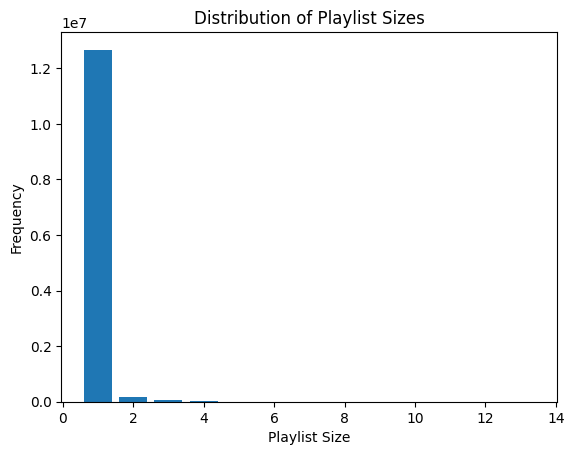

In [48]:
# Distribution of Playlist Sizes
import seaborn as sns
import matplotlib.pyplot as plt

playlist_size = df['playlistname'].apply(lambda x: len(x.split(',')))
plt.bar(playlist_size.value_counts().index, playlist_size.value_counts().values)
plt.xlabel('Playlist Size')
plt.ylabel('Frequency')
plt.title('Distribution of Playlist Sizes')
plt.show()

Majority of playlist sizes are 1, so most portion of playlists consist of single tracks

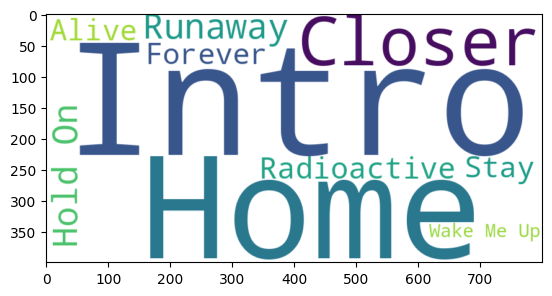

In [49]:
top_n_tracks = df['trackname'].astype(str).value_counts().head(10)
from wordcloud import WordCloud
wordcloud_data = dict(zip(top_n_tracks.index, top_n_tracks.values))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)
plt.imshow(wordcloud, interpolation='bilinear')

## User Segmentation

In [50]:
segmented_df = df.copy()
segmented_df

,user_id,artistname,trackname,playlistname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010
...,...,...,...,...
12891619,2302bf9c64dc63d88a750215ed187f2c,Mötley Crüe,Wild Side,iPhone
12891620,2302bf9c64dc63d88a750215ed187f2c,John Lennon,Woman,iPhone
12891621,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Don't Know How It Feels,iPhone
12891622,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Wreck Me,iPhone


In [51]:

segmented_df[['user_id', 'playlistname']].value_counts()

user_id                           playlistname                                          
4398de6902abde3351347b048fcdc287  Starred                                                   47362
68756b4d60b6fac27789e85c2b63d1c6  Starred                                                   18510
c410ee930bd5f0e4893632503ec17b05  Starred                                                   18084
f2604a69836c94d00fcd11dd602944fc  everything                                                15824
6b85a8076b4f3b1036ef15f09e2feeeb  Generos                                                   14877
                                                                                            ...  
77fb6aaef631f798992c0e3c341f4376  Happy hardcore                                                1
                                  Drum & Bass                                                   1
b2aa73946de806f318a4931dc6ded72d  Riptide - FlicFlac Edit                                       1
ed7e04b3ac6e8e9bcc87215dc3d84

In [52]:
segmented_df[(segmented_df['user_id'] == '4398de6902abde3351347b048fcdc287') & (segmented_df['playlistname'] == 'Starred')]

,user_id,artistname,trackname,playlistname
6639902,4398de6902abde3351347b048fcdc287,The Gaslight Anthem,"45""""",Starred
6639903,4398de6902abde3351347b048fcdc287,Rebekka Karijord,"I´ve Always Been Jealous of Migratory Birds""""",Starred
6639904,4398de6902abde3351347b048fcdc287,Mutual Benefit,"Let's Play"" / Statue of a Man""",Starred
6639905,4398de6902abde3351347b048fcdc287,Lucius,"Turn It Around""- Spotify Sessions Curated by J...",Starred
6639906,4398de6902abde3351347b048fcdc287,Shakey Graves,"Unlucky Skin"" - Live from Spotify Nyc""",Starred
...,...,...,...,...
6687259,4398de6902abde3351347b048fcdc287,Raised By Swans,Öxnadalur,Starred
6687260,4398de6902abde3351347b048fcdc287,Victor Villarreal,“That Familiar Band” Song,Starred
6687261,4398de6902abde3351347b048fcdc287,Ryan Hemsworth,「Every Square Inch」 - With Qrion,Starred
6687262,4398de6902abde3351347b048fcdc287,Joy Wellboy,﻿Lay Down Your Blade,Starred


In [53]:
segmented_df

,user_id,artistname,trackname,playlistname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010
...,...,...,...,...
12891619,2302bf9c64dc63d88a750215ed187f2c,Mötley Crüe,Wild Side,iPhone
12891620,2302bf9c64dc63d88a750215ed187f2c,John Lennon,Woman,iPhone
12891621,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Don't Know How It Feels,iPhone
12891622,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Wreck Me,iPhone


In [54]:
segmented_df = segmented_df.drop_duplicates(subset=['user_id', 'playlistname'])
segmented_df['click_count'] = 1
user_item_matrix = segmented_df.groupby(['user_id', 'trackname'])['click_count'].sum().reset_index()

/var/folders/3t/t58dnlt54s5cdr1hhtxqb5hr0000gn/T/ipykernel_4244/2382358588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmented_df['click_count'] = 1


In [55]:
user_item_matrix

,user_id,trackname,click_count
0,00055176fea33f6e027cd3302289378b,18,1
1,0007f3dd09c91198371454c608d47f22,(Everything I Do) I Do It For You,1
2,0007f3dd09c91198371454c608d47f22,2014,1
3,0007f3dd09c91198371454c608d47f22,Hurt,1
4,000b0f32b5739f052b9d40fcc5c41079,A Blessed Christmas Eve,1
...,...,...,...
223428,fff616055993498d6127f3f467cf9f2b,All About It (feat. Ed Sheeran),1
223429,fff616055993498d6127f3f467cf9f2b,All Jacked Up,1
223430,fff616055993498d6127f3f467cf9f2b,Animal (Billboard Remix),1
223431,fff616055993498d6127f3f467cf9f2b,Cinema,1


In [56]:
user_item_matrix

,user_id,trackname,click_count
0,00055176fea33f6e027cd3302289378b,18,1
1,0007f3dd09c91198371454c608d47f22,(Everything I Do) I Do It For You,1
2,0007f3dd09c91198371454c608d47f22,2014,1
3,0007f3dd09c91198371454c608d47f22,Hurt,1
4,000b0f32b5739f052b9d40fcc5c41079,A Blessed Christmas Eve,1
...,...,...,...
223428,fff616055993498d6127f3f467cf9f2b,All About It (feat. Ed Sheeran),1
223429,fff616055993498d6127f3f467cf9f2b,All Jacked Up,1
223430,fff616055993498d6127f3f467cf9f2b,Animal (Billboard Remix),1
223431,fff616055993498d6127f3f467cf9f2b,Cinema,1


In [57]:
# Assuming user_item_matrix is your DataFrame



In [58]:
from scipy.sparse import csr_matrix
numeric_user_item_matrix = user_item_matrix.pivot_table(index='user_id', columns='trackname', values='click_count', fill_value=0)
sparse_user_item_matrix = csr_matrix(numeric_user_item_matrix)

In [59]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(sparse_user_item_matrix.T)

In [60]:
track_similarity_df = pd.DataFrame(similarity_matrix, index=numeric_user_item_matrix.columns, columns=numeric_user_item_matrix.columns)

In [61]:
track_similarity_df

trackname,""" (Acoustical ) by Everclear""",15 Years of Tummy Touch Records in Dub,Da,Daedelus - Looking Ocean Ep,"Dios Te Bendiga """"",Episode 22,History O,"Jewel "" Taking Refuge In The Three Jewels""",New Wave,"R.I.P """"",!,! (Foreword),! (Take No),! (The Song Formerly Known As),! (foreword),! - Foreword,! Ay Carmela ¡,!!!,!!!!!!!,!!De Repente!!,!!Noble Stabbings!!,!*?&#! Truckers,!@*$%#,!@ck Da Club Up,"!Ah, el novio no quere dinero!","!Al Ladron, Al Ladron¡",!Aqua No Ma!,"!Ay, Consuelo!",!Ay... Llevame¡ (Creacion Flamenca),!Basura!,!Bienvenido Leo!,"!Depocalipsis, Joderowsky!",!Fire In the Barn!,!Franchesckaar!,!H.a.p.p.y!,!Hoy Estreno!,!Hoy Estreno! - Demo Sant Feliu,!Knuf - Original Mix,!Libera Me!,!Lucha Contra De La Injusticia!,...,ابي منها الخبر (feat. Abi Menha Al Khabar),คนไม่พิเศษ,คิดถึงเธอทุกที(ที่อยู่คนเดียว),ฉันรักเธอที่เป็นแบบนี้,‘Invierno porteño’ – Winter in Buenos Aires,"“Ef Ég Hefði Aldrei..."",CHILL""","“Further Complications."",2-FirstLadyPatate Juin 2009""","“Further Complications."",DBP (v2.1.1)""","“Further Complications."",Favoritas de la radio""","“Further Complications."",Jarvis Cocker – Further Complications""","“Further Complications."",Jarvis Cocker""","“Further Complications."",Listen and die with a smile""","“Further Complications."",Mi plei lists""","“Further Complications."",NO ESPAÑOL""","“Further Complications."",Para el coche""","“Further Complications."",Pulp and Jarvis ""","“Further Complications."",Spotify Library""","“Further Complications."",Viral Noise""","“Further Complications."",ggg""","“Further Complications."",jarvis cocker""",一個人不可能,一個人就好,一天,一路向北,一點光一點亮,不多,不萬能的喜劇 (The Less Than Omnipotent Comedy),主旋律,五點鐘去天光墟,他不准我哭(Unplugged '05),他夏了夏天 - Live,凡人的告白書,可愛女人,嘻嘻哈哈過新年,憨阿嬤,虚無の終わり 箱詰めの黙示,虹の彼方 (Kneeeeee Remix),꽃,﻿Before The Sunrise,🐯🐯🐯🐯
trackname,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
""" (Acoustical ) by Everclear""",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15 Years of Tummy Touch Records in Dub,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Da,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Daedelus - Looking Ocean Ep,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Dios Te Bendiga """"",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
虚無の終わり 箱詰めの黙示,0.0,0.0,0

In [62]:
track_similarity_df.columns

Index(['            "  (Acoustical ) by Everclear"',
       ' 15 Years of Tummy Touch Records in Dub', ' Da',
       ' Daedelus - Looking Ocean Ep', ' Dios Te Bendiga ""', ' Episode 22',
       ' History O', ' Jewel " Taking Refuge In The Three Jewels"',
       ' New Wave', ' R.I.P ""',
       ...
       '他夏了夏天 - Live', '凡人的告白書', '可愛女人', '嘻嘻哈哈過新年', '憨阿嬤', '虚無の終わり 箱詰めの黙示',
       '虹の彼方 (Kneeeeee Remix)', '꽃', '﻿Before The Sunrise', '🐯🐯🐯🐯'],
      dtype='object', name='trackname', length=78499)

In [63]:
track_similarity_df.index.name = None
track_similarity_df

,""" (Acoustical ) by Everclear""",15 Years of Tummy Touch Records in Dub,Da,Daedelus - Looking Ocean Ep,"Dios Te Bendiga """"",Episode 22,History O,"Jewel "" Taking Refuge In The Three Jewels""",New Wave,"R.I.P """"",!,! (Foreword),! (Take No),! (The Song Formerly Known As),! (foreword),! - Foreword,! Ay Carmela ¡,!!!,!!!!!!!,!!De Repente!!,!!Noble Stabbings!!,!*?&#! Truckers,!@*$%#,!@ck Da Club Up,"!Ah, el novio no quere dinero!","!Al Ladron, Al Ladron¡",!Aqua No Ma!,"!Ay, Consuelo!",!Ay... Llevame¡ (Creacion Flamenca),!Basura!,!Bienvenido Leo!,"!Depocalipsis, Joderowsky!",!Fire In the Barn!,!Franchesckaar!,!H.a.p.p.y!,!Hoy Estreno!,!Hoy Estreno! - Demo Sant Feliu,!Knuf - Original Mix,!Libera Me!,!Lucha Contra De La Injusticia!,...,ابي منها الخبر (feat. Abi Menha Al Khabar),คนไม่พิเศษ,คิดถึงเธอทุกที(ที่อยู่คนเดียว),ฉันรักเธอที่เป็นแบบนี้,‘Invierno porteño’ – Winter in Buenos Aires,"“Ef Ég Hefði Aldrei..."",CHILL""","“Further Complications."",2-FirstLadyPatate Juin 2009""","“Further Complications."",DBP (v2.1.1)""","“Further Complications."",Favoritas de la radio""","“Further Complications."",Jarvis Cocker – Further Complications""","“Further Complications."",Jarvis Cocker""","“Further Complications."",Listen and die with a smile""","“Further Complications."",Mi plei lists""","“Further Complications."",NO ESPAÑOL""","“Further Complications."",Para el coche""","“Further Complications."",Pulp and Jarvis ""","“Further Complications."",Spotify Library""","“Further Complications."",Viral Noise""","“Further Complications."",ggg""","“Further Complications."",jarvis cocker""",一個人不可能,一個人就好,一天,一路向北,一點光一點亮,不多,不萬能的喜劇 (The Less Than Omnipotent Comedy),主旋律,五點鐘去天光墟,他不准我哭(Unplugged '05),他夏了夏天 - Live,凡人的告白書,可愛女人,嘻嘻哈哈過新年,憨阿嬤,虚無の終わり 箱詰めの黙示,虹の彼方 (Kneeeeee Remix),꽃,﻿Before The Sunrise,🐯🐯🐯🐯
""" (Acoustical ) by Everclear""",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15 Years of Tummy Touch Records in Dub,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Da,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Daedelus - Looking Ocean Ep,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Dios Te Bendiga """"",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
虚無の終わり 箱詰めの黙示,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [77]:
recommendations = track_similarity_df[' New Wave'].sort_values(ascending=False)[1:2]
recommendations

African Sleigh Ride    0.57735
Name:  New Wave, dtype: float64

In [80]:
top_recommendation = recommendations.index.item()

## LLM Song Descriptions

In [65]:
def generate_song_descriptions(song):
    generator = pipeline('text-generation', 'gpt2')
    set_seed(42)
    output = generator(song, max_length=30, num_return_sequences=5, top_k=50)
    return output

In [81]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
output = generator(top_recommendation, max_length=30, num_return_sequences=5, top_k=50)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [82]:
sentiment_analyzer = pipeline("sentiment-analysis")
sequence_scores = []
for sequence in output:
    sentiment_score = sentiment_analyzer(sequence['generated_text'])[0]["score"]
    total_score = sentiment_score
    sequence_scores.append([sequence['generated_text'], total_score])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [83]:
sequence_scores

[['African Sleigh Ride" at the U.N. headquarters in Nairobi.\n\nA police officer\'s body camera video also shows police officers',
  0.981939971446991],
 ['African Sleigh Ride and in December 2012, he and three other men were arrested following a fight over the use of a stun gun in San Francisco,',
  0.980771005153656],
 ['African Sleigh Ride," has already been sold out of town. The group\'s new single, "Stay with Me," was released at a new venue',
  0.7325963377952576],
 ['African Sleigh Ride was the third installment of the Star Wars movie trilogy after Battle of the Bastards, as well as the first of the Return of',
  0.9957129955291748],
 ['African Sleigh Ride is set to arrive in November and will be produced by Chris Anderson, who also wrote The Last Ship, an animated feature about a',
  0.9942215085029602]]

In [84]:
sequence_scores.sort(key=lambda x: x[1], reverse=True)
sequence_scores

[['African Sleigh Ride was the third installment of the Star Wars movie trilogy after Battle of the Bastards, as well as the first of the Return of',
  0.9957129955291748],
 ['African Sleigh Ride is set to arrive in November and will be produced by Chris Anderson, who also wrote The Last Ship, an animated feature about a',
  0.9942215085029602],
 ['African Sleigh Ride" at the U.N. headquarters in Nairobi.\n\nA police officer\'s body camera video also shows police officers',
  0.981939971446991],
 ['African Sleigh Ride and in December 2012, he and three other men were arrested following a fight over the use of a stun gun in San Francisco,',
  0.980771005153656],
 ['African Sleigh Ride," has already been sold out of town. The group\'s new single, "Stay with Me," was released at a new venue',
  0.7325963377952576]]

In [85]:
from Levenshtein import distance
scores = []
for val in range(len(output)):
    for val_2 in range(1, len(output)):
        score = distance(output[val]['generated_text'], output[val_2]['generated_text'])
        scores.append([output[val]['generated_text'], output[val_2]['generated_text'], score])
scores

[['African Sleigh Ride" at the U.N. headquarters in Nairobi.\n\nA police officer\'s body camera video also shows police officers',
  'African Sleigh Ride and in December 2012, he and three other men were arrested following a fight over the use of a stun gun in San Francisco,',
  94],
 ['African Sleigh Ride" at the U.N. headquarters in Nairobi.\n\nA police officer\'s body camera video also shows police officers',
  'African Sleigh Ride," has already been sold out of town. The group\'s new single, "Stay with Me," was released at a new venue',
  89],
 ['African Sleigh Ride" at the U.N. headquarters in Nairobi.\n\nA police officer\'s body camera video also shows police officers',
  'African Sleigh Ride was the third installment of the Star Wars movie trilogy after Battle of the Bastards, as well as the first of the Return of',
  94],
 ['African Sleigh Ride" at the U.N. headquarters in Nairobi.\n\nA police officer\'s body camera video also shows police officers',
  'African Sleigh Ride is s

In [86]:
scores.sort(key=lambda x: x[2], reverse=True)
scores

[['African Sleigh Ride and in December 2012, he and three other men were arrested following a fight over the use of a stun gun in San Francisco,',
  'African Sleigh Ride is set to arrive in November and will be produced by Chris Anderson, who also wrote The Last Ship, an animated feature about a',
  100],
 ['African Sleigh Ride is set to arrive in November and will be produced by Chris Anderson, who also wrote The Last Ship, an animated feature about a',
  'African Sleigh Ride and in December 2012, he and three other men were arrested following a fight over the use of a stun gun in San Francisco,',
  100],
 ['African Sleigh Ride" at the U.N. headquarters in Nairobi.\n\nA police officer\'s body camera video also shows police officers',
  'African Sleigh Ride is set to arrive in November and will be produced by Chris Anderson, who also wrote The Last Ship, an animated feature about a',
  99],
 ['African Sleigh Ride and in December 2012, he and three other men were arrested following a fi

In [87]:
scores[:5]

[['African Sleigh Ride and in December 2012, he and three other men were arrested following a fight over the use of a stun gun in San Francisco,',
  'African Sleigh Ride is set to arrive in November and will be produced by Chris Anderson, who also wrote The Last Ship, an animated feature about a',
  100],
 ['African Sleigh Ride is set to arrive in November and will be produced by Chris Anderson, who also wrote The Last Ship, an animated feature about a',
  'African Sleigh Ride and in December 2012, he and three other men were arrested following a fight over the use of a stun gun in San Francisco,',
  100],
 ['African Sleigh Ride" at the U.N. headquarters in Nairobi.\n\nA police officer\'s body camera video also shows police officers',
  'African Sleigh Ride is set to arrive in November and will be produced by Chris Anderson, who also wrote The Last Ship, an animated feature about a',
  99],
 ['African Sleigh Ride and in December 2012, he and three other men were arrested following a fi

In [88]:
sentiment_weight, levenshtein_weight = 0.7, 0.3
combined_scores = []
for sentiment_entry, levenshtein_entry in zip(sequence_scores, scores):
    sentiment_sentence, sentiment_score = sentiment_entry
    levenshtein_sent_1, levenshtein_sent_2, levenshtein_score = levenshtein_entry

    # Normalize sentiment score (assuming sentiment score is in the range [0, 1])
    normalized_sentiment_score = sentiment_score

    # Combine scores using weighted average
    combined_score = (sentiment_weight * normalized_sentiment_score) + (levenshtein_weight * levenshtein_score)

    # Store the combined score along with the sequences
    combined_scores.append([sentiment_sentence, levenshtein_sent_1, levenshtein_sent_2, combined_score])

# Sort the combined scores based on the combined score
sorted_combined_scores = sorted(combined_scores, key=lambda x: x[3], reverse=True)

# Select the top sequence
top_sequence = sorted_combined_scores[0]

print("Top Sequence:", top_sequence)

Top Sequence: ['African Sleigh Ride was the third installment of the Star Wars movie trilogy after Battle of the Bastards, as well as the first of the Return of', 'African Sleigh Ride and in December 2012, he and three other men were arrested following a fight over the use of a stun gun in San Francisco,', 'African Sleigh Ride is set to arrive in November and will be produced by Chris Anderson, who also wrote The Last Ship, an animated feature about a', 30.69699909687042]


In [91]:


output = {
    'collaborative_filtering_recommendations': top_recommendation,
    'Sentiment Sentence': top_sequence[0],
    'Combined Score': top_sequence[3]
}

In [92]:
output

{'collaborative_filtering_recommendations': 'African Sleigh Ride',
 'Sentiment Sentence': 'African Sleigh Ride was the third installment of the Star Wars movie trilogy after Battle of the Bastards, as well as the first of the Return of',
 'Combined Score': 30.69699909687042}

## A/B Hypothesis Testing


In [93]:
import numpy as np
hypothesis_df = track_similarity_df.copy()
hypothesis_df['version'] = np.random.choice(['A', 'B'], size=len(df))
hypothesis_df

In [ ]:
for version in hypothesis_df['version'].unique():
    group_data = hypothesis_df[hypothesis_df['version'] == version][